In [ ]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
from google.colab import files
uploaded=files.upload()

Saving voice.csv to voice.csv


# Getting the data set

In [74]:
df=pd.read_csv("voice.csv")

# Data Observation

In [75]:
df.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

In [76]:
df.shape

(3168, 21)

In [77]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [78]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

### We have no need to change any of the data types.

In [79]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

### removing duplicates and outliers(IQR method)

In [80]:
df.duplicated().sum()

2

In [81]:
df.describe(percentiles=[0.05,0.80,0.95,0.97,0.99])

meanfreq           sd       median          Q25          Q75  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.224765   
std       0.029918     0.016652     0.036360     0.048680     0.023639   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
5%        0.125968     0.031617     0.116355     0.043580     0.187414   
50%       0.184838     0.059155     0.190032     0.140286     0.225684   
80%       0.203362     0.070910     0.215442     0.182861     0.246684   
95%       0.229104     0.085487     0.235826     0.215244     0.257678   
97%       0.233168     0.088102     0.239574     0.222019     0.259722   
99%       0.238485     0.092981     0.245386     0.227841     0.264985   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.084309     3.140168    36.568461     0.895127     0.408216   
std       0.042783     4.240529   134.928661     0.044980     0.177521   
min       0.014558     0.141735     2.068455     0.738651     0.036876   
5%        0.025487     1.122956     3.755363     0.816751     0.158445   
50%       0.094280     2.197101     8.318463     0.901767     0.396335   
80%       0.117819     3.131731    15.526993     0.934780     0.571437   
95%       0.156319     6.918371    75.169131     0.962986     0.732825   
97%       0.167528    15.890713   392.643196     0.966102     0.754305   
99%       0.182003    27.522948   840.898182     0.971920     0.782647   
max       0.252225    34.725453  1309.612887     0.981997     0.842936   

              mode     centroid      meanfun       minfun       maxfun  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.165282     0.180907     0.142807     0.036802     0.258842   
std       0.077203     0.029918     0.032304     0.019220     0.030077   
min       0.000000     0.039363     0.055565     0.009775     0.103093   
5%        0.000000     0.125968     0.093627     0.015795     0.192470   
50%       0.186599     0.184838     0.140519     0.046110     0.271186   
80%       0.230229     0.203362     0.173912     0.048387     0.277457   
95%       0.260813     0.229104     0.193432     0.056441     0.279070   
97%       0.268556     0.233168     0.198810     0.069261     0.279070   
99%       0.277153     0.238485     0.207501     0.096230     0.279070   
max       0.280000     0.251124     0.237636     0.204082     0.279114   

           meandom       mindom       maxdom      dfrange      modindx  
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000  
mean      0.829211     0.052647     5.047277     4.994630     0.173752  
std       0.525205     0.063299     3.521157     3.520039     0.119454  
min       0.007812     0.004883     0.007812     0.000000     0.000000  
5%        0.104490     0.007812     0.312500     0.265625     0.057750  
50%       0.765795     0.023438     4.992188     4.945312     0.139357  
80%       1.271781     0.097656     8.062500     8.039062     0.238269  
95%       1.800402     0.187500    10.640625    10.608984     0.405516  
97%       1.940791     0.210938    11.531016    11.484141     0.486956  
99%       2.201069     0.234375    15.609375    15.413203     0.629674  
max       2.957682     0.458984    21.867188    21.843750     0.932374

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


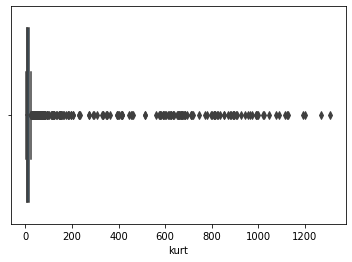

In [82]:
from warnings import filterwarnings
sns.boxplot(df['kurt'])

In [83]:
q1=df['kurt'].quantile(0.25)
q3=df['kurt'].quantile(0.75)
print(q1,q3)
iqr=q3-q1
print(iqr)

5.669546855819335 13.64890531977815
7.979358463958815


In [84]:
ll=q1-1.5*iqr
ul=q3+1.5*iqr
ll,ul

(-6.299490840118888, 25.61794301571637)

In [85]:
 df['kurt']=np.where(df['kurt']>27,27,df['kurt'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


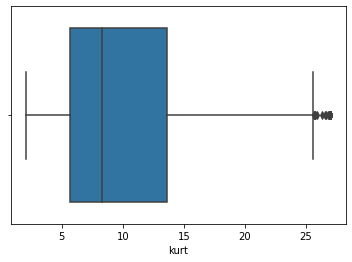

In [86]:
sns.boxplot(df['kurt'])

In [87]:
df1=df.select_dtypes(include=['object'])
df1

label
0       male
1       male
2       male
3       male
4       male
...      ...
3163  female
3164  female
3165  female
3166  female
3167  female

[3168 rows x 1 columns]

In [88]:
df_1=pd.get_dummies(df)
df_1.drop(labels=['label_female'],axis=1,inplace=True)

In [89]:
df_1

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

           kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0     27.000000  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1     27.000000  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2     27.000000  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3      4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4      4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   
...         ...       ...       ...  ...       ...       ...       ...   
3163   6.630383  0.962934  0.763182  ...  0.131884  0.182790  0.083770   
3164   2.503954  0.960716  0.709570  ...  0.116221  0.188980  0.034409   
3165   6.604509  0.946854  0.654196  ...  0.142056  0.209918  0.039506   
3166   5.388298  0.950436  0.675470  ...  0.143659  0.172375  0.034483   
3167   5.769115  0.938829  0.601529  ...  0.165509  0.185607  0.062257   

        maxfun   meandom    mindom    maxdom   dfrange   modindx  label_male  
0     0.275862  0.007812  0.007812  0.007812  0.000000  0.000000           1  
1     0.250000  0.009014  0.007812  0.054688  0.046875  0.052632           1  
2     0.271186  0.007990  0.007812  0.015625  0.007812  0.046512           1  
3     0.250000  0.201497  0.007812  0.562500  0.554688  0.247119           1  
4     0.266667  0.712812  0.007812  5.484375  5.476562  0.208274           1  
...        ...       ...       ...       ...       ...       ...         ...  
3163  0.262295  0.832899  0.007812  4.210938  4.203125  0.161929           0  
3164  0.275862  0.909856  0.039062  3.679688  3.640625  0.277897           0  
3165  0.275862  0.494271  0.007812  2.937500  2.929688  0.194759           0  
3166  0.250000  0.791360  0.007812  3.593750  3.585938  0.311002           0  
3167  0.271186  0.227022  0.007812  0.554688  0.546875  0.350000           0  

[3168 rows x 21 columns]

In [90]:
df_1.rename(columns = {'label_male':'TARGET'}, inplace = True)

In [91]:
df_1

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

           kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0     27.000000  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1     27.000000  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2     27.000000  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3      4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4      4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   
...         ...       ...       ...  ...       ...       ...       ...   
3163   6.630383  0.962934  0.763182  ...  0.131884  0.182790  0.083770   
3164   2.503954  0.960716  0.709570  ...  0.116221  0.188980  0.034409   
3165   6.604509  0.946854  0.654196  ...  0.142056  0.209918  0.039506   
3166   5.388298  0.950436  0.675470  ...  0.143659  0.172375  0.034483   
3167   5.769115  0.938829  0.601529  ...  0.165509  0.185607  0.062257   

        maxfun   meandom    mindom    maxdom   dfrange   modindx  TARGET  
0     0.275862  0.007812  0.007812  0.007812  0.000000  0.000000       1  
1     0.250000  0.009014  0.007812  0.054688  0.046875  0.052632       1  
2     0.271186  0.007990  0.007812  0.015625  0.007812  0.046512       1  
3     0.250000  0.201497  0.007812  0.562500  0.554688  0.247119       1  
4     0.266667  0.712812  0.007812  5.484375  5.476562  0.208274       1  
...        ...       ...       ...       ...       ...       ...     ...  
3163  0.262295  0.832899  0.007812  4.210938  4.203125  0.161929       0  
3164  0.275862  0.909856  0.039062  3.679688  3.640625  0.277897       0  
3165  0.275862  0.494271  0.007812  2.937500  2.929688  0.194759       0  
3166  0.250000  0.791360  0.007812  3.593750  3.585938  0.311002       0  
3167  0.271186  0.227022  0.007812  0.554688  0.546875  0.350000       0  

[3168 rows x 21 columns]

In [92]:
r=df_1['TARGET'].value_counts()
r

1    1584
0    1584
Name: TARGET, dtype: int64

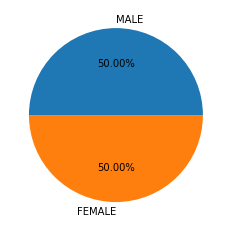

In [93]:
plt.pie(r,labels=['MALE','FEMALE'],autopct='%1.2f%%')
plt.show()

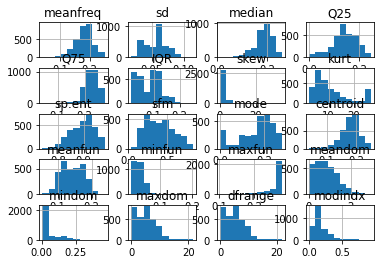

<Figure size 1944x720 with 0 Axes>

In [28]:
df.hist();
plt.figure(figsize=(27,10))
plt.show()

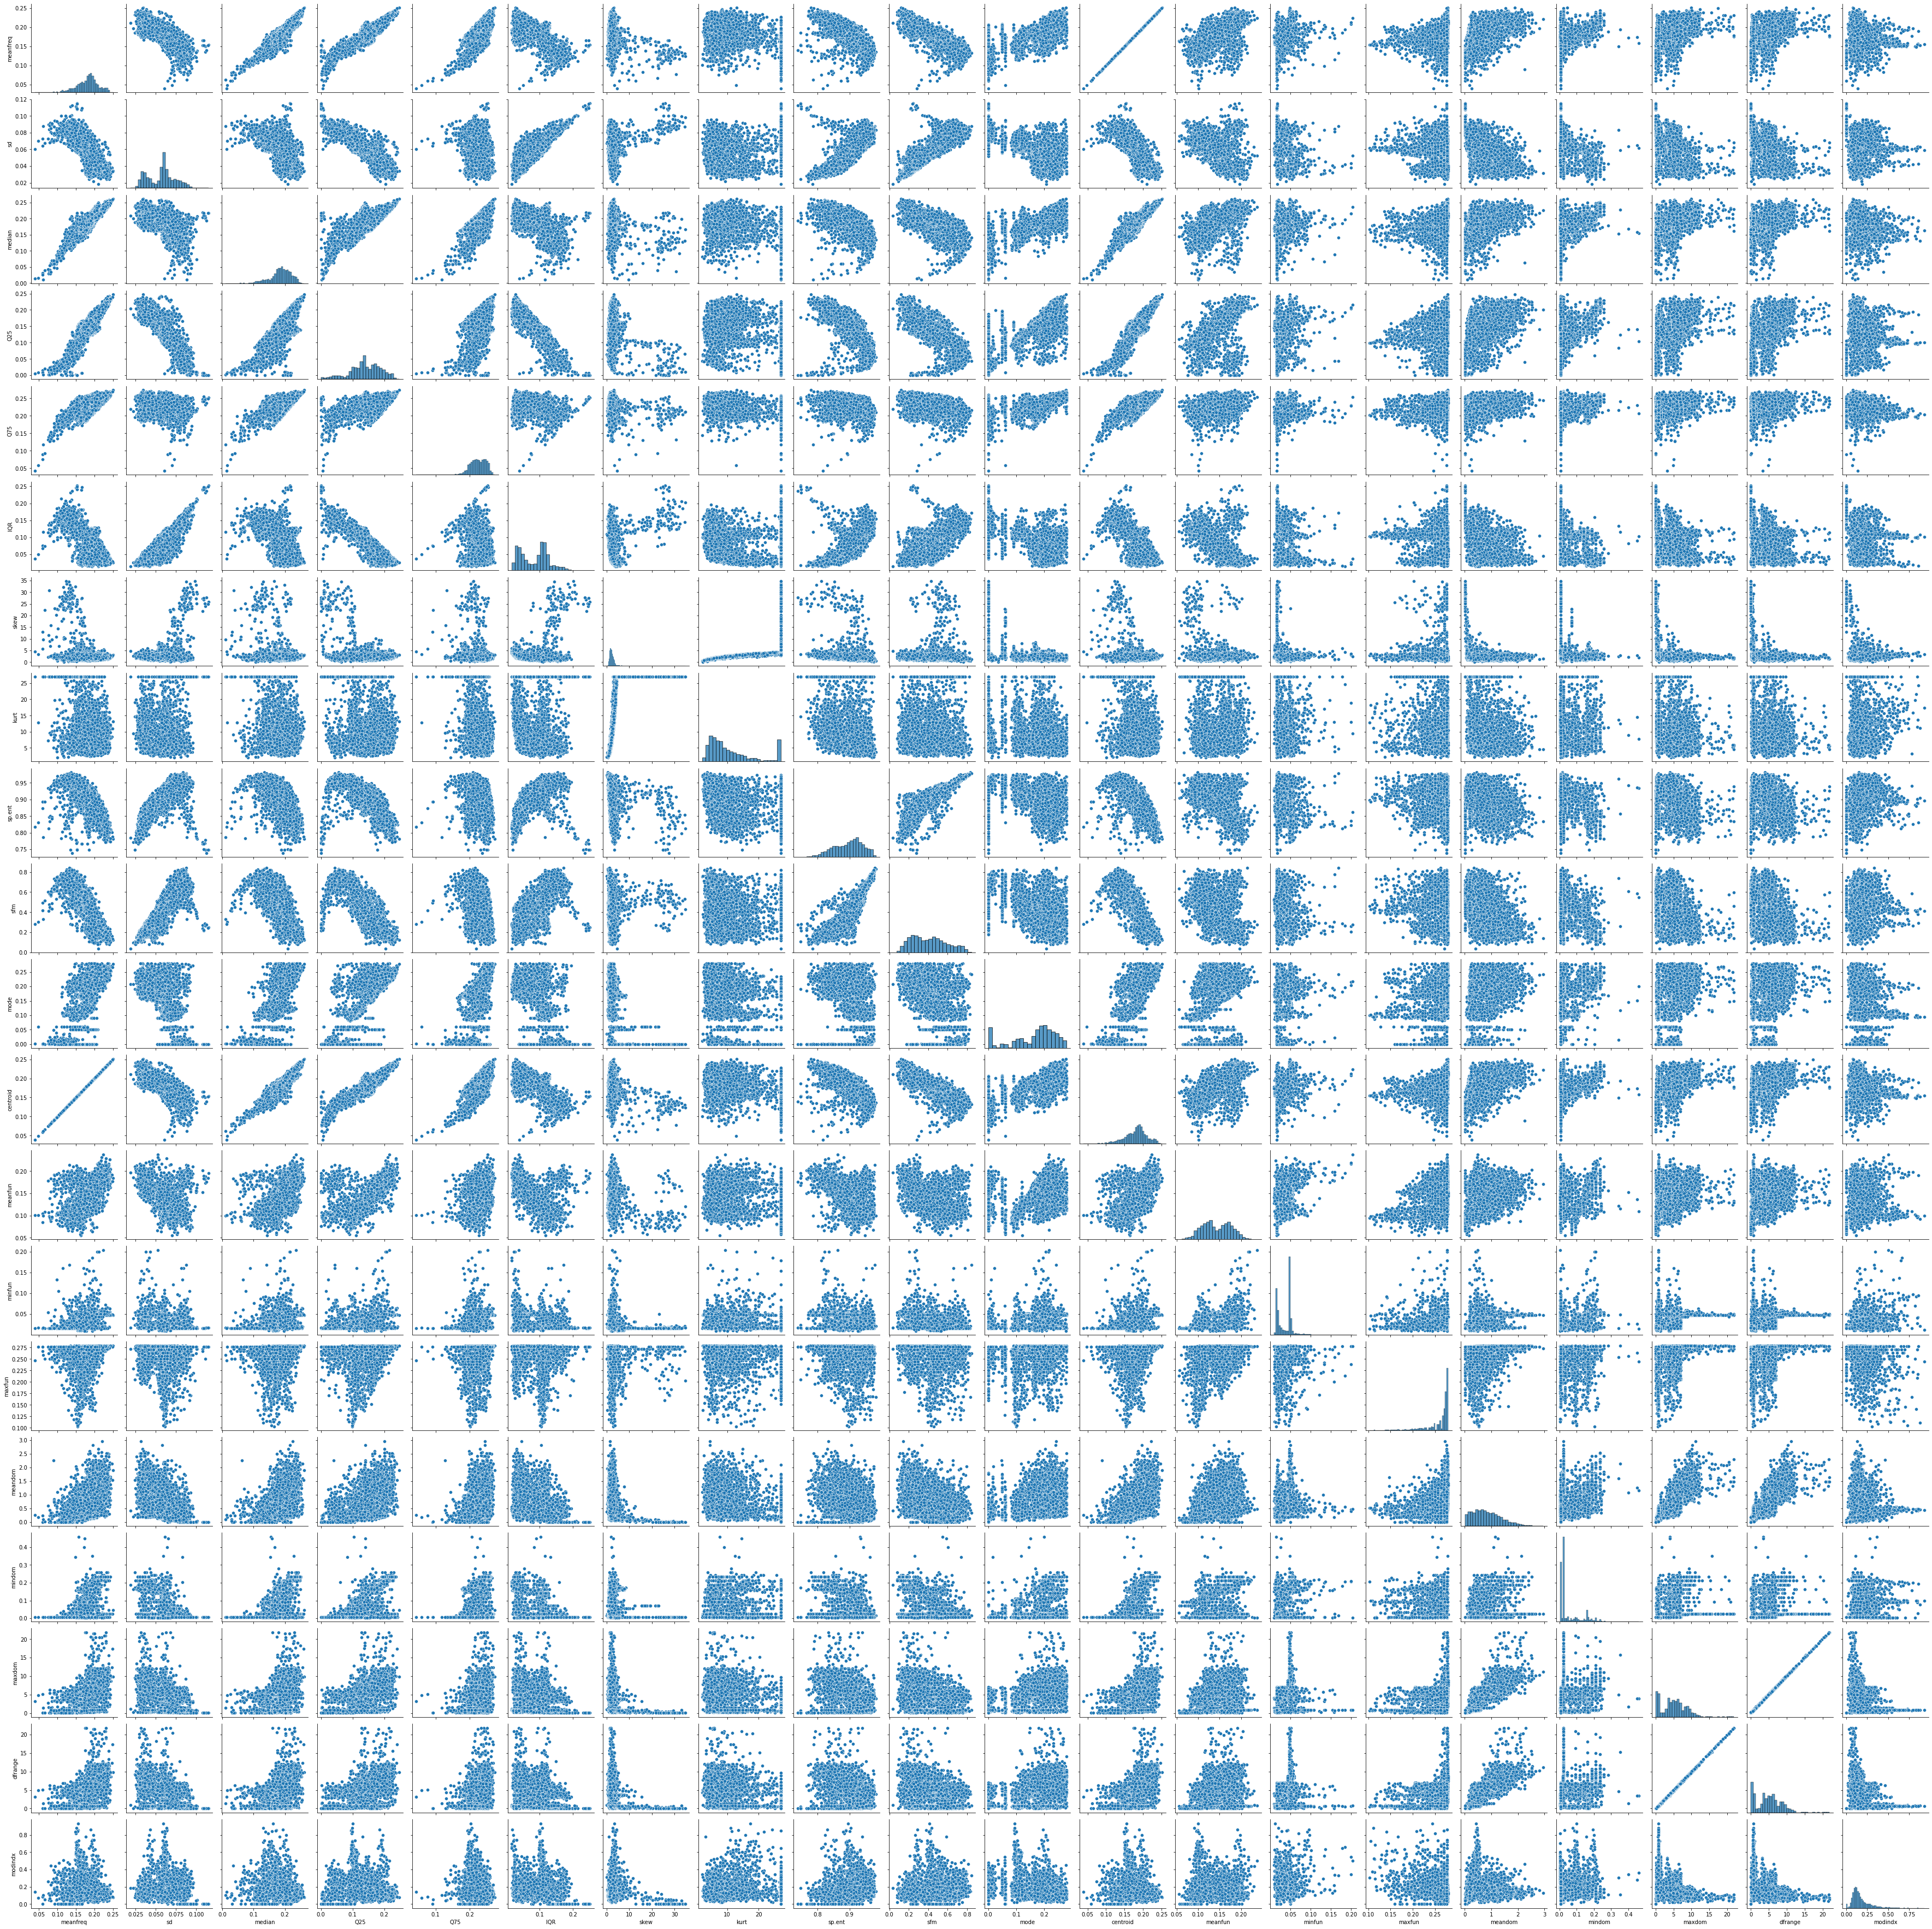

In [29]:
sns.pairplot(df)

<Figure size 1656x1728 with 0 Axes>

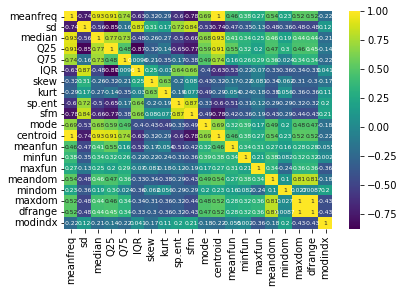

<Figure size 1656x1728 with 0 Axes>

In [30]:
sns.heatmap(df.corr(),cmap='viridis',annot=True,annot_kws={"size":6})
plt.figure(figsize=(23,24))

In [94]:
df.corr()

meanfreq        sd    median       Q25       Q75       IQR  \
meanfreq  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
sd       -0.739039  1.000000 -0.562603 -0.846931 -0.161076  0.874660   
median    0.925445 -0.562603  1.000000  0.774922  0.731849 -0.477352   
Q25       0.911416 -0.846931  0.774922  1.000000  0.477140 -0.874189   
Q75       0.740997 -0.161076  0.731849  0.477140  1.000000  0.009636   
IQR      -0.627605  0.874660 -0.477352 -0.874189  0.009636  1.000000   
skew     -0.322327  0.314597 -0.257407 -0.319475 -0.206339  0.249497   
kurt     -0.291241  0.167514 -0.273791 -0.142454 -0.347383 -0.029854   
sp.ent   -0.601203  0.716620 -0.502005 -0.648126 -0.174905  0.640813   
sfm      -0.784332  0.838086 -0.661690 -0.766875 -0.378198  0.663601   
mode      0.687715 -0.529150  0.677433  0.591277  0.486857 -0.403764   
centroid  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
meanfun   0.460844 -0.466281  0.414909  0.545035  0.155091 -0.534462   
minfun    0.383937 -0.345609  0.337602  0.320994  0.258002 -0.222680   
maxfun    0.274004 -0.129662  0.251328  0.199841  0.285584 -0.069588   
meandom   0.536666 -0.482726  0.455943  0.467403  0.359181 -0.333362   
mindom    0.229261 -0.357667  0.191169  0.302255 -0.023750 -0.357037   
maxdom    0.519528 -0.482278  0.438919  0.459683  0.335114 -0.337877   
dfrange   0.515570 -0.475999  0.435621  0.454394  0.335648 -0.331563   
modindx  -0.216979  0.122660 -0.213298 -0.141377 -0.216475  0.041252   

              skew      kurt    sp.ent       sfm      mode  centroid  \
meanfreq -0.322327 -0.291241 -0.601203 -0.784332  0.687715  1.000000   
sd        0.314597  0.167514  0.716620  0.838086 -0.529150 -0.739039   
median   -0.257407 -0.273791 -0.502005 -0.661690  0.677433  0.925445   
Q25      -0.319475 -0.142454 -0.648126 -0.766875  0.591277  0.911416   
Q75      -0.206339 -0.347383 -0.174905 -0.378198  0.486857  0.740997   
IQR       0.249497 -0.029854  0.640813  0.663601 -0.403764 -0.627605   
skew      1.000000  0.626201 -0.195459  0.079694 -0.434859 -0.322327   
kurt      0.626201  1.000000 -0.192004  0.076949 -0.494484 -0.291241   
sp.ent   -0.195459 -0.192004  1.000000  0.866411 -0.325298 -0.601203   
sfm       0.079694  0.076949  0.866411  1.000000 -0.485913 -0.784332   
mode     -0.434859 -0.494484 -0.325298 -0.485913  1.000000  0.687715   
centroid -0.322327 -0.291241 -0.601203 -0.784332  0.687715  1.000000   
meanfun  -0.167668 -0.054353 -0.513194 -0.421066  0.324771  0.460844   
minfun   -0.216954 -0.236034 -0.305826 -0.362100  0.385467  0.383937   
maxfun   -0.080861 -0.177227 -0.120738 -0.192369  0.172329  0.274004   
meandom  -0.336848 -0.379325 -0.293562 -0.428442  0.491479  0.536666   
mindom   -0.061608  0.056386 -0.294869 -0.289593  0.198150  0.229261   
maxdom   -0.305651 -0.360970 -0.324253 -0.436649  0.477187  0.519528   
dfrange  -0.304640 -0.362099 -0.319054 -0.431580  0.473775  0.515570   
modindx  -0.169325  0.110395  0.198074  0.211477 -0.182344 -0.216979   

           meanfun    minfun    maxfun   meandom    mindom    maxdom  \
meanfreq  0.460844  0.383937  0.274004  0.536666  0.229261  0.519528   
sd       -0.466281 -0.345609 -0.129662 -0.482726 -0.357667 -0.482278   
median    0.414909  0.337602  0.251328  0.455943  0.191169  0.438919   
Q25       0.545035  0.320994  0.199841  0.467403  0.302255  0.459683   
Q75       0.155091  0.258002  0.285584  0.359181 -0.023750  0.335114   
IQR      -0.534462 -0.222680 -0.069588 -0.333362 -0.357037 -0.337877   
skew     -0.167668 -0.216954 -0.080861 -0.336848 -0.061608 -0.305651   
kurt     -0.054353 -0.236034 -0.177227 -0.379325  0.056386 -0.360970   
sp.ent   -0.513194 -0.305826 -0.120738 -0.293562 -0.294869 -0.324253   
sfm      -0.421066 -0.362100 -0.192369 -0.428442 -0.289593 -0.436649   
mode      0.324771  0.385467  0.172329  0.491479  0.198150  0.477187   
centroid  0.460844  0.383937  0.274004  0.536666  0.229261  0.519528   
meanfun   1.000000  0.339387  0.311950  0.270840

## Train-Test split

In [95]:
x=df_1.drop('TARGET',axis=1)
y=df_1['TARGET']

In [96]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [97]:
X_train

meanfreq        sd    median       Q25       Q75       IQR      skew  \
807   0.180360  0.053766  0.189474  0.141895  0.213474  0.071579  1.473165   
2495  0.185643  0.065043  0.203955  0.186017  0.223454  0.037437  2.732155   
2529  0.203908  0.045961  0.201869  0.177944  0.239626  0.061682  2.247859   
2241  0.115789  0.081103  0.102197  0.038124  0.193181  0.155057  1.620439   
2981  0.179889  0.067810  0.163096  0.137244  0.246925  0.109681  2.106748   
...        ...       ...       ...       ...       ...       ...       ...   
3092  0.166738  0.052677  0.169427  0.162650  0.189223  0.026573  7.550412   
1095  0.198718  0.058959  0.217333  0.143111  0.252000  0.108889  1.116666   
1130  0.202333  0.063001  0.221946  0.137544  0.264817  0.127273  2.000371   
1294  0.181799  0.058102  0.192037  0.123670  0.225568  0.101897  1.091660   
860   0.167732  0.066225  0.171886  0.112598  0.225196  0.112598  0.822981   

           kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
807    4.899974  0.918149  0.395065  0.186526  0.180360  0.132277  0.047013   
2495  11.206323  0.898330  0.476308  0.199666  0.185643  0.175833  0.048241   
2529  10.481790  0.898687  0.358451  0.177944  0.203908  0.169617  0.047291   
2241   6.600749  0.962574  0.746873  0.017620  0.115789  0.200910  0.075829   
2981   8.030296  0.932428  0.551025  0.156253  0.179889  0.136662  0.033898   
...         ...       ...       ...       ...       ...       ...       ...   
3092  27.000000  0.865282  0.427317  0.167465  0.166738  0.152651  0.022727   
1095   3.569725  0.917123  0.363369  0.227556  0.198718  0.139322  0.050473   
1130   6.681799  0.873847  0.261759  0.272855  0.202333  0.123610  0.047291   
1294   4.009295  0.925575  0.427947  0.190731  0.181799  0.110586  0.049741   
860    3.103282  0.953210  0.634648  0.173381  0.167732  0.126107  0.048096   

        maxfun   meandom    mindom    maxdom   dfrange   modindx  
807   0.279070  0.968568  0.023438  4.148438  4.125000  0.128314  
2495  0.275862  1.077674  0.023438  6.023438  6.000000  0.086686  
2529  0.274286  1.265126  0.023438  8.554688  8.531250  0.084143  
2241  0.258065  0.452257  0.007812  1.578125  1.570312  0.250933  
2981  0.277778  0.963949  0.043945  3.999023  3.955078  0.261785  
...        ...       ...       ...       ...       ...       ...  
3092  0.208333  0.174154  0.161133  0.214844  0.053711  0.136364  
1095  0.279070  0.792092  0.023438  4.968750  4.945312  0.155766  
1130  0.269663  1.190168  0.023438  7.429688  7.406250  0.093438  
1294  0.274286  0.789062  0.023438  4.359375  4.335938  0.062312  
860   0.279070  0.813616  0.023438  6.023438  6.000000  0.123384  

[2534 rows x 20 columns]

### We get to see that there will be binary classification so this will be classification model.
#### Models to be implemented:
a. Decision Tree Classifier 
b. Random Forest Classifier 
c. KNN Classifier 
d. Logistic Regression 
e. SVM Classifier

### Decision tree classifier

In [98]:
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [99]:
d=tree.DecisionTreeClassifier()
d.fit(X_train,y_train)

DecisionTreeClassifier()

In [100]:
d.score(X_test,y_test)

0.9637223974763407

In [101]:
y_pred=d.predict(X_train)

In [102]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1287
           1       1.00      1.00      1.00      1247

    accuracy                           1.00      2534
   macro avg       1.00      1.00      1.00      2534
weighted avg       1.00      1.00      1.00      2534



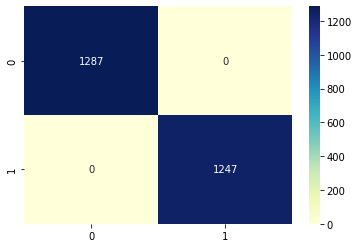

In [103]:
a=confusion_matrix(y_train,y_pred)
sns.heatmap(a,annot=True, cmap="YlGnBu",fmt='g')

In [104]:
y_pred_t=d.predict(X_test)
print(classification_report(y_test,y_pred_t))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       297
           1       0.98      0.95      0.97       337

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



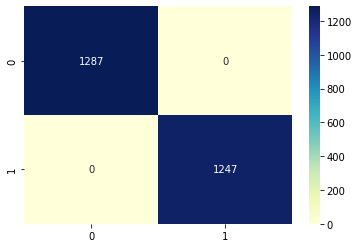

In [105]:
b=confusion_matrix(y_train,y_pred)
sns.heatmap(b,annot=True, cmap="YlGnBu",fmt='g')

### Random Forest Classifier

In [106]:
 from sklearn.ensemble import RandomForestClassifier

In [107]:
r=RandomForestClassifier()
r.fit(X_train,y_train)

RandomForestClassifier()

In [108]:
r.score(X_test,y_test)

0.9826498422712934

In [109]:
y_pred=r.predict(X_train)

In [110]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1287
           1       1.00      1.00      1.00      1247

    accuracy                           1.00      2534
   macro avg       1.00      1.00      1.00      2534
weighted avg       1.00      1.00      1.00      2534



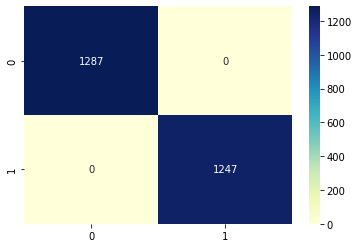

In [111]:
a=confusion_matrix(y_train,y_pred)
sns.heatmap(a,annot=True, cmap="YlGnBu",fmt='g')

In [112]:
y_pred_t=r.predict(X_test)

In [113]:
print(classification_report(y_test,y_pred_t))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       297
           1       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



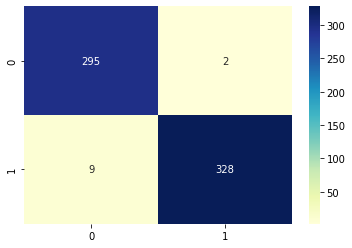

In [114]:
b=confusion_matrix(y_test,y_pred_t)
sns.heatmap(b,annot=True, cmap="YlGnBu",fmt='g')

### KNN


In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [135]:
knn.score(X_test,y_test)

0.7003154574132492

In [117]:
y_pred=knn.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1287
           1       0.80      0.83      0.82      1247

    accuracy                           0.82      2534
   macro avg       0.82      0.82      0.82      2534
weighted avg       0.82      0.82      0.82      2534



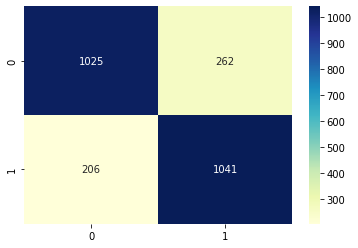

In [118]:
a=confusion_matrix(y_train,y_pred)
sns.heatmap(a,annot=True, cmap="YlGnBu",fmt='g')

In [119]:
y_pred_t=knn.predict(X_test)
print(classification_report(y_test,y_pred_t))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       297
           1       0.73      0.70      0.71       337

    accuracy                           0.70       634
   macro avg       0.70      0.70      0.70       634
weighted avg       0.70      0.70      0.70       634



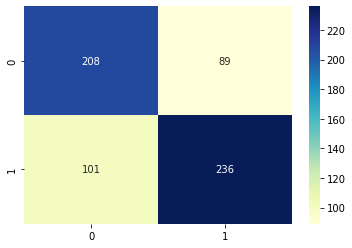

In [120]:
b=confusion_matrix(y_test,y_pred_t)
sns.heatmap(b,annot=True, cmap="YlGnBu",fmt='g')

### SVM

In [121]:
from sklearn import  svm
s=svm.SVC()
s.fit(X_train,y_train)

SVC()

In [122]:
s.score(X_test,y_test)


0.6782334384858044

In [123]:
y_pred=s.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68      1287
           1       0.67      0.79      0.72      1247

    accuracy                           0.70      2534
   macro avg       0.71      0.71      0.70      2534
weighted avg       0.71      0.70      0.70      2534



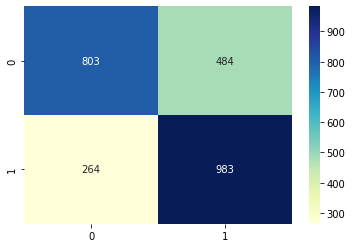

In [124]:
a=confusion_matrix(y_train,y_pred)
sns.heatmap(a,annot=True, cmap="YlGnBu",fmt='g')

In [125]:
y_pred_t=s.predict(X_test)
print(classification_report(y_test,y_pred_t))

              precision    recall  f1-score   support

           0       0.67      0.61      0.64       297
           1       0.68      0.74      0.71       337

    accuracy                           0.68       634
   macro avg       0.68      0.67      0.67       634
weighted avg       0.68      0.68      0.68       634



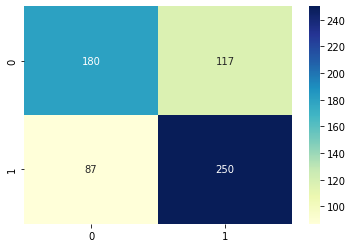

In [126]:
b=confusion_matrix(y_test,y_pred_t)
sns.heatmap(b,annot=True, cmap="YlGnBu",fmt='g')

### Linear Regression

In [127]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
lr = linear_model.LogisticRegression(random_state =42)
lr.fit(X_scaled, y_train)

LogisticRegression(random_state=42)

In [128]:
lr.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.46845425867507884

In [129]:
print(lr.predict(X_scaled))

[1 0 0 ... 1 1 1]


In [130]:
y_pred = lr.predict(X_scaled)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1287
           1       0.97      0.98      0.97      1247

    accuracy                           0.97      2534
   macro avg       0.97      0.97      0.97      2534
weighted avg       0.97      0.97      0.97      2534



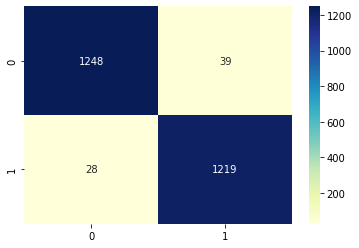

In [131]:
a=confusion_matrix(y_train,y_pred)
sns.heatmap(a,annot=True, cmap="YlGnBu",fmt='g')

In [132]:
y_pred_t=lr.predict(X_test)
print(classification_report(y_test,y_pred_t))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64       297
           1       0.00      0.00      0.00       337

    accuracy                           0.47       634
   macro avg       0.23      0.50      0.32       634
weighted avg       0.22      0.47      0.30       634



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being s

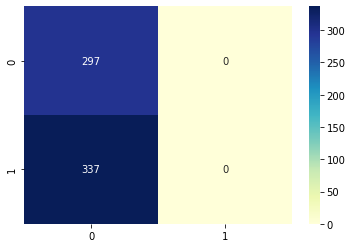

In [133]:
b=confusion_matrix(y_test,y_pred_t)
sns.heatmap(b,annot=True, cmap="YlGnBu",fmt='g')

## Comparing all models

In [138]:
print("Scores of different classification models are: ")
print("DECISION TREE CLASSIFIER = ",d.score(X_test,y_test))
print("RANDOM FOREST CLASSIFIER = ",r.score(X_test,y_test))
print("KNN CLASSIFIER = ",knn.score(X_test,y_test))
print("SVM CLASSIFIER = ",s.score(X_test,y_test))
print("LOGISTIC REGRESSION CLASSIFIER = ",lr.score(X_test,y_test))

Scores of different classification models are: 
DECISION TREE CLASSIFIER =  0.9637223974763407
RANDOM FOREST CLASSIFIER =  0.9826498422712934
KNN CLASSIFIER =  0.7003154574132492
SVM CLASSIFIER =  0.6782334384858044
LOGISTIC REGRESSION CLASSIFIER =  0.46845425867507884


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


#### Thus, we get the best score and confusion matrix for the RANDOM FOREST CLASSIFIER model.
#### **RANDOM FOREST CLASSIFIER model is the best among all used the classification models for given dataset.**